In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv('accidents.csv')

In [ ]:
data

,AccidentDate,Timing,State,WeatherCondition,RoadCondition,Deaths,Reason
0,04-02-2013,Morning,Alaska,Rainy,Under Construction,10,Drunk Driving
1,23-02-2005,Night,Arizona,Clear,Under Construction,3,Weather Conditions
2,08-10-2014,Afternoon,California,Clear,Fine,6,Poor Visibility
3,14-01-2015,Night,Colorado,Rainy,Rough,8,Road Conditions
4,17-01-2006,Afternoon,Georgia,Clear,Fine,2,Speeding
...,...,...,...,...,...,...,...
49995,20-08-2002,Night,Virginia,Clear,Under Construction,2,Mechanical Failure
49996,15-05-2012,Night,Virginia,Clear,Under Construction,0,Mechanical Failure
49997,19-05-2007,Evening,North Carolina,Rainy,Under Construction,2,Driver Fatigue
49998,04-08-2019,Night,South Carolina,Clear,Fine,0,Distracted Driving


In [ ]:
data.shape

(16568, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16568 entries, 0 to 16567
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AccidentDate      16568 non-null  object 
 1   Timing            16568 non-null  object 
 2   State             16567 non-null  object 
 3   WeatherCondition  16567 non-null  object 
 4   RoadCondition     16567 non-null  object 
 5   Deaths            16567 non-null  float64
 6   Reason            16567 non-null  object 
dtypes: float64(1), object(6)
memory usage: 906.2+ KB


In [ ]:
data.describe()

,Deaths
count,16567.000000
mean,4.989437
std,3.153189
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


In [ ]:
data.isnull().sum()

AccidentDate        0
Timing              0
State               1
WeatherCondition    1
RoadCondition       1
Deaths              1
Reason              1
dtype: int64

In [ ]:
data.columns

Index(['AccidentDate', 'Timing', 'State', 'WeatherCondition', 'RoadCondition',
       'Deaths', 'Reason'],
      dtype='object')

In [ ]:
data.AccidentDate.unique()

array(['04-02-2013', '23-02-2005', '08-10-2014', ..., '03-05-2020',
       '21-12-2015', '30-12-2013'], dtype=object)

In [ ]:
data.Timing.unique()

array(['Morning', 'Night', 'Afternoon', 'Evening', 'Mornin'], dtype=object)

In [ ]:
data.State.unique()

array(['Alaska', 'Arizona', 'California', 'Colorado', 'Georgia',
       'Indiana', 'Louisiana', 'Nevada', 'Montana', 'New Jersey',
       'New Mexico', 'New York', 'Ohio', 'Pennsylvania', 'Texas',
       'Virginia', 'Washington', 'North Carolina', 'South Carolina',
       'Wisconsin', 'Wyoming', 'West Virginia', 'Florida', 'Vermont',
       'Michigan', 'Minnesota', 'Illinois', 'Iowa', nan], dtype=object)

In [ ]:
data.WeatherCondition.unique()

array(['Rainy', 'Clear', 'Foggy', nan], dtype=object)

In [ ]:
data.RoadCondition.unique()

array(['Under Construction', 'Fine', 'Rough', nan], dtype=object)

In [ ]:
data.Deaths.unique()

array([10.,  3.,  6.,  8.,  2.,  4.,  0.,  5.,  1.,  9.,  7., nan])

In [ ]:
data.Reason.unique()

array(['Drunk Driving', 'Weather Conditions', 'Poor Visibility',
       'Road Conditions', 'Speeding', 'Reckless Driving',
       'Distracted Driving', 'Driver Fatigue', 'Mechanical Failure', nan],
      dtype=object)

<ipython-input-34-b67585783d4d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="State", data=data, order=data['State'].value_counts().index,palette='icefire')


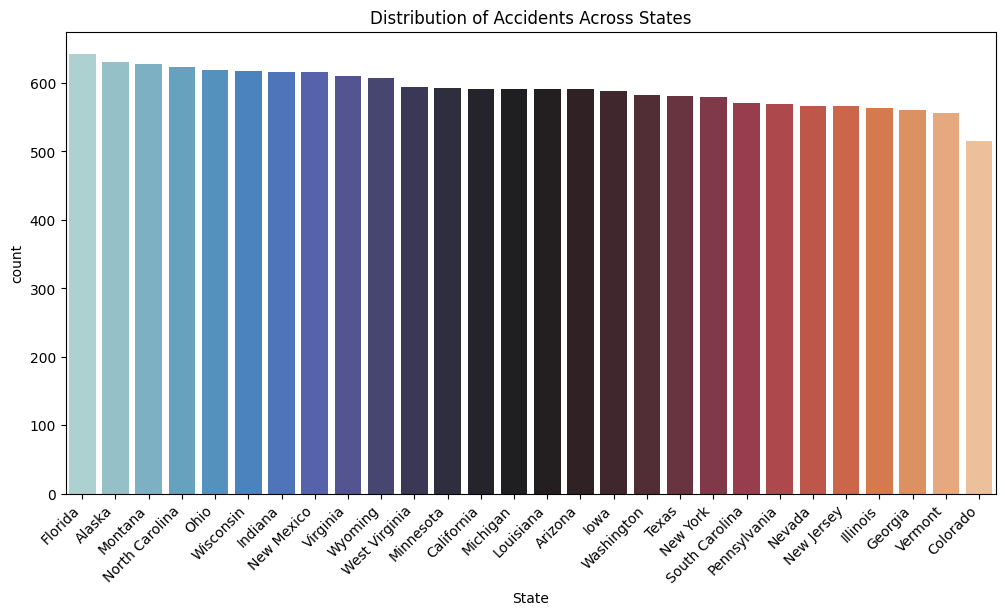

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="State", data=data, order=data['State'].value_counts().index,palette='icefire')
plt.title("Distribution of Accidents Across States")
plt.xticks(rotation=45, ha="right")
plt.show()

<ipython-input-48-548d7469e45b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="RoadCondition", data=data, order=data['RoadCondition'].value_counts().index,palette='viridis')


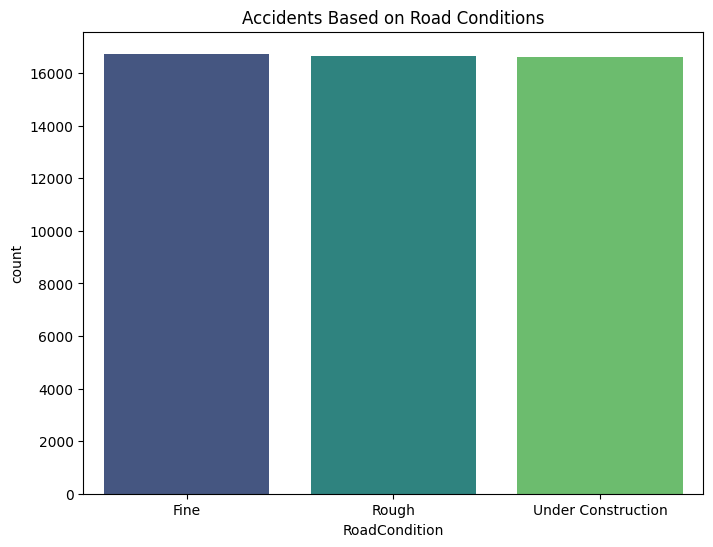

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x="RoadCondition", data=data, order=data['RoadCondition'].value_counts().index,palette='viridis')
plt.title("Accidents Based on Road Conditions")
plt.show()

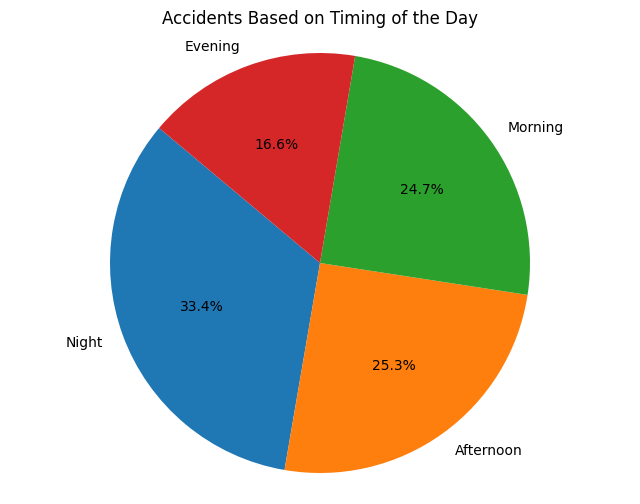

In [ ]:
# Calculate the counts for each timing
timing_counts = data['Timing'].value_counts()
colors = plt.cm.tab20.colors[:len(timing_counts)]
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(timing_counts, labels=timing_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Accidents Based on Timing of the Day")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

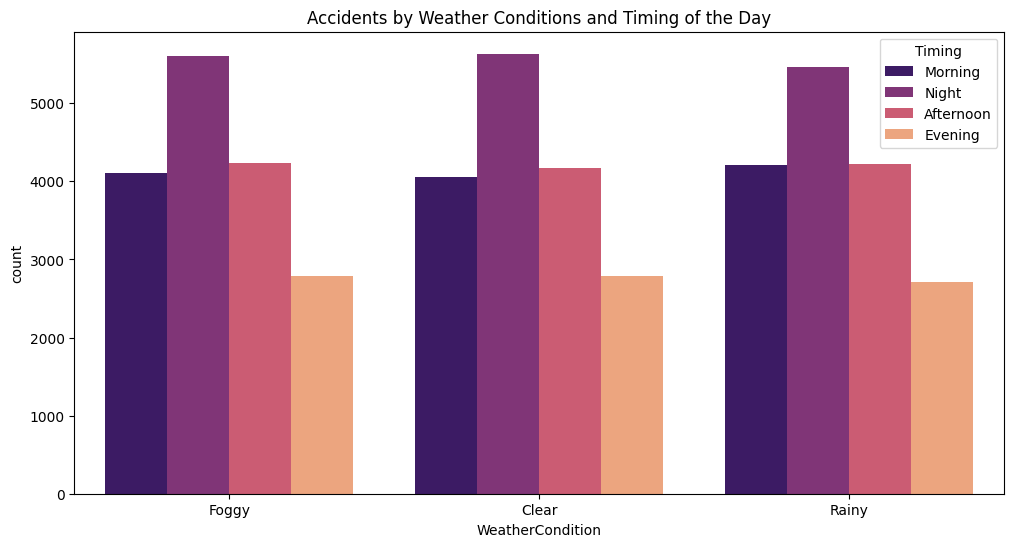

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x="WeatherCondition", hue="Timing", data=data, order=data['WeatherCondition'].value_counts().index,palette='magma')
plt.title("Accidents by Weather Conditions and Timing of the Day")
plt.show()

<ipython-input-68-b85eeee5e8ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="vlag")


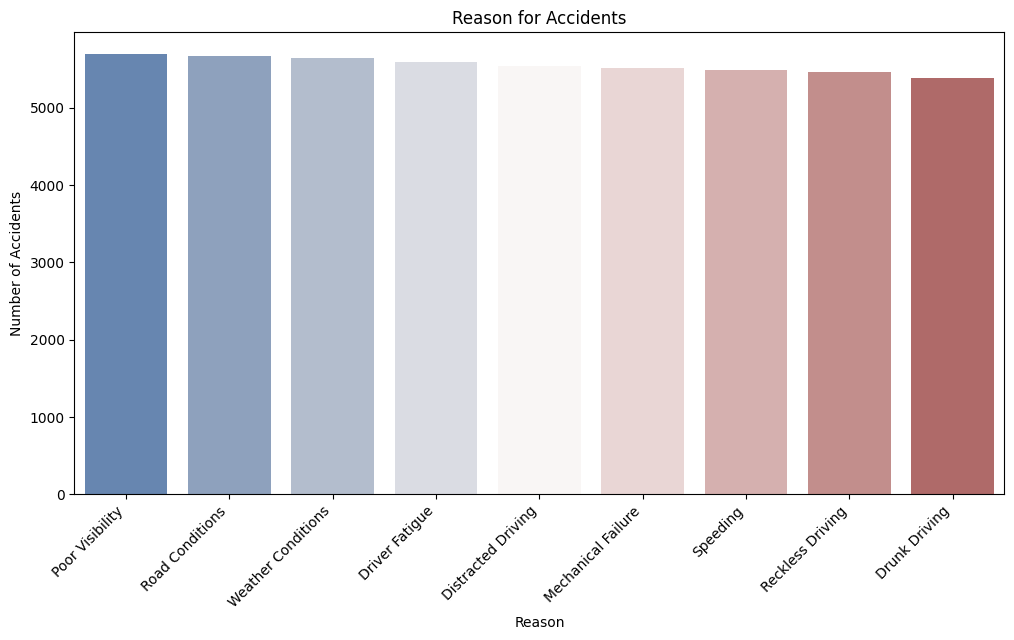

In [ ]:
plt.figure(figsize=(12, 6))
reasons_accidents = data['Reason'].value_counts()
sns.barplot(x=reasons_accidents.index, y=reasons_accidents.values, palette="vlag")
plt.title("Reason for Accidents")
plt.xlabel("Reason")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45, ha="right")
plt.show()

<Figure size 5000x1000 with 0 Axes>

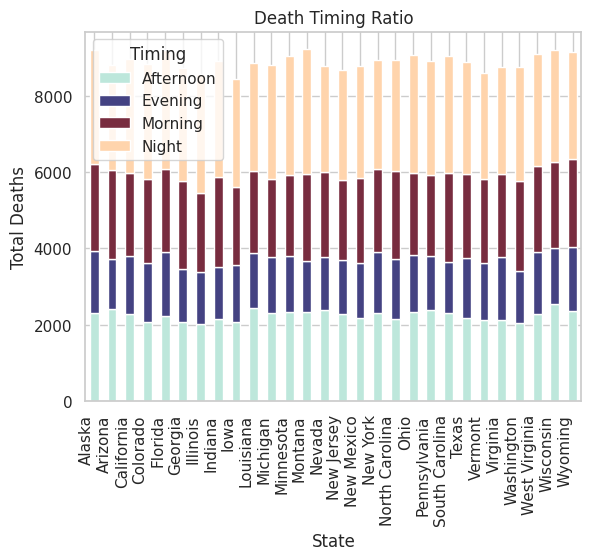

In [ ]:
sns.set(style="whitegrid")

# Group the data by state and timing, and calculate the total number of deaths
state_timingdeaths = data.groupby(['State', 'Timing'])['Deaths'].sum().reset_index()

# Pivot the table to get a format suitable for plotting
state_timingdeaths_pivot = state_timingdeaths.pivot(index='State', columns='Timing', values='Deaths').fillna(0)

# Create a bar plot for state-wise total death timing ratio
plt.figure(figsize=(50, 10))
state_timingdeaths_pivot.plot(kind='bar', stacked=True, colormap="icefire")
plt.title("Death Timing Ratio")
plt.xlabel("State")
plt.ylabel("Total Deaths")
plt.xticks(rotation=90, ha="right")
plt.legend(title="Timing")
plt.show()